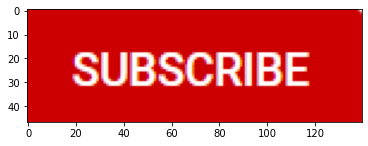

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image1_a=mpimg.imread("im1.PNG")
image1_b=cv2.imread('im1.PNG',cv2.IMREAD_COLOR)
image1_b[20:170,40:360]=[35,25,4]

plt.imshow(image2)
np.zeros()

#colorbox=np.copy(image1)


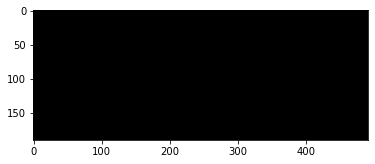

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image1=mpimg.imread("im1.JPG")
image2=np.copy(image1)*0
plt.imshow(image2)
image2[:]=[255,0,0]

[0 0 0]
(540, 960, 3)


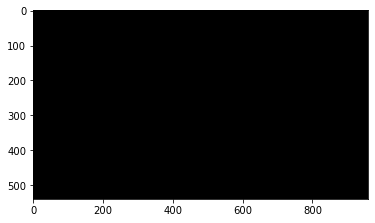

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image1=mpimg.imread("test_images\solidWhiteCurve.JPG")
image2=np.copy(image1)*0
plt.imshow(image2)
print(image2[50,50])
print(np.shape(image1))

In [ ]:
"""
colorbox[:]=[255,0,0]

image2=mpimg.imread("im2.PNG")
image3=mpimg.imread("im3.PNG")

combo=cv2.addWeighted(image1,0.8,colorbox,0.2,0)
plt.imshow(combo)"""



<IPython.core.display.Javascript object>


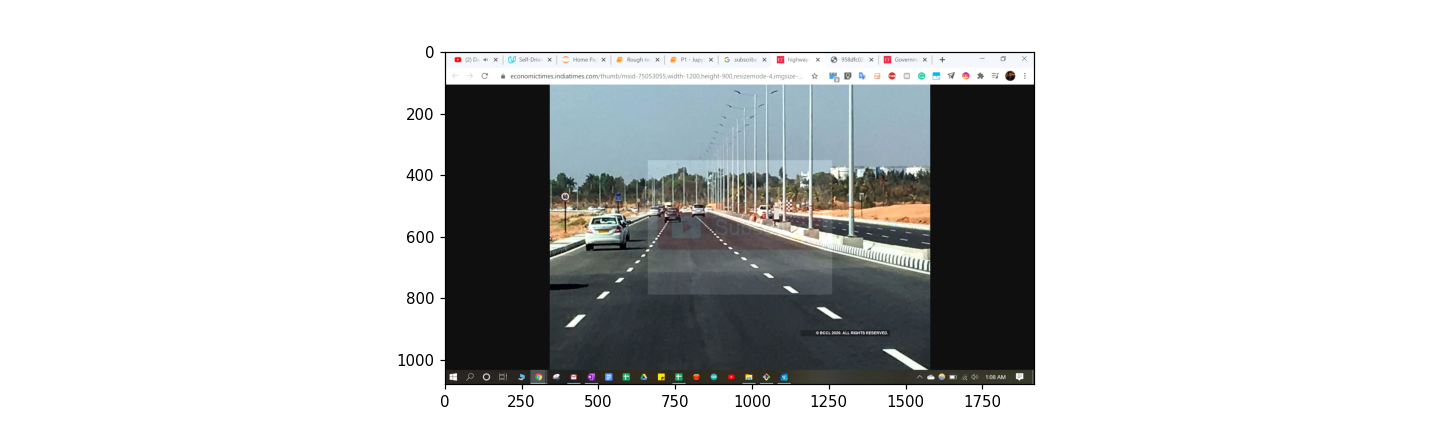

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook
image1=mpimg.imread("test1.JPG")
image2=mpimg.imread("test2.JPG")
combo=cv2.addWeighted(image1,1,image2,0.1,0)
plt.imshow(combo)

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
540
145
844


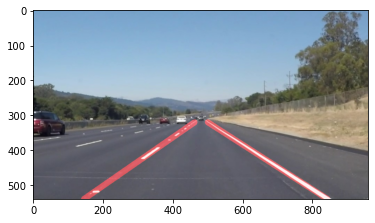

In [17]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import statistics

#drawing static image in our notebook (standard solution to add plots to Jupyter notebook)
%matplotlib inline
#you can keep toggling between this and %matplotlib notebook to track coordinates of pixels in the image

def read_image():
    img = mpimg.imread('test_images/solidWhiteRight.jpg')
    print('This image is:', type(img), 'with dimensions:', img.shape)
    return img  

def grayscale(img):
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #using RGB to gray because image has been imported using mpimg.imread (use BGR in case you used cv2.imread)
    """NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image    

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    global lines
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)       
    draw_lines(line_img, lines)
    #print(lines[0][0][2])    
    return line_img

def draw_lines(img, lines, color=[255, 255, 255], thickness=2):
    """
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)


"""Reading in an image
Input the image location in the function defined at the top"""
image = read_image()
#plt.imshow(image)   """Test to check if image loaded properly"""
        
"""Convert image to a grayscale image named gray_img"""
gray_img = grayscale(image) 
#plt.imshow(gray_img, cmap='gray') 

"""Apply Gaussian filter before applying canny function"""
filtered_gray_img=gaussian_blur(gray_img,5)

"""Apply canny to get pixels at the gradient of color intensity"""
canny_img = canny(filtered_gray_img,50,150)
#plt.imshow(canny_img,cmap='gray')   

"""Apply mask: We'll keep only the part ocupied by lane in front of the vehicle in the image
      Assumption: Camera is mounted at the front of the vehicle"""

# (1) Add vertices. Each coordinate tuple should be of the form (x,y). Origin is at the top left of the image
vertices=np.array([[(60,540),(453,320),(523,320),(920,540)]],dtype=np.int32)

# (2) Apply mask on the image and ONLY keep the region formed by the above polygon
roi_img=region_of_interest(canny_img,vertices)
#plt.imshow(roi_img,cmap='gray')   

"""Apply Hough Transform"""
hough_line_img=hough_lines(roi_img,2,np.pi/180,50,5,10)
#plt.imshow(hough_line_img)


"""Equation of line: y=mx+c (m = slope, c = y intercept)"""

"""We want to draw 2 lines from the top part of our region of interest to the bottom edge of the region. 
To do that, we'll require the coordinates of the top most point of lines and slope of the line"""


"First, we'll find a ALLOWED range for the slope of our lines to ignore randomly oriented lines that come by mistake"

#finding the slope of the sides of our trapezium. 
#We need to remember viewing the cartesian plane from top left corner
slope_left_edge= (vertices[0][1][1]-vertices[0][0][1])/(vertices[0][1][0]-vertices[0][0][0])
slope_right_edge= (vertices[0][2][1]-vertices[0][3][1])/(vertices[0][2][0]-vertices[0][3][0])
#result: -0.54 and 0.55 respectively
# arctan(0.55)=30 degrees. The slope of lanes are steeper than our polygon boundary and should be near 45 degrees(roughly).  
#So m should lie between 2.144 and 0.466 (corresponding to inverse of 65 and 25 degrees) 


"""Task:1- Finding average slope of lines on the left side and right side of the lane"""
"""Task:2- Taking intersection of all lines on the left side with y_top (i.e. topmost side of our mask polygon)
           We'll find the x coordinate of each line's intersection with that line. We'll then average it"""
        
m_left=[]    #intializing lists to store values for individual lines. Later we'll average the values
m_right=[]
x_top_left=[]
x_top_right=[]
y_top=vertices[0][1][1]

for line in lines:      #"lines" is a global variable declared in "hough_lines" function
    #print(line)
    for x1,y1,x2,y2 in line:
        m=(y2-y1)/(x2-x1)
        c=((x2)*(y1)-(x1)*(y2))/(x2-x1)
        if m<0 and m>-2.14 and m<-0.55:
            m_left.append(m)
            x_top_left.append((y_top-c)/m)
        if m>0 and m>0.55 and m<2.14:
            m_right.append(m)
            x_top_right.append((y_top-c)/m)

            
m_left_avg=statistics.mean(m_left)
m_right_avg=statistics.mean(m_right)
x_top_left_avg=int(statistics.mean(x_top_left))
x_top_right_avg=int(statistics.mean(x_top_right))

c_left=(y_top)-(m_left_avg*x_top_left_avg)
c_right=(y_top)-(m_right_avg*x_top_right_avg)

y_bottom=vertices[0][0][1]
x_bottom_left= int((y_bottom-c_left)/m_left_avg) 
x_bottom_right= int((y_bottom-c_right)/m_right_avg)
print(y_bottom)
print(x_bottom_left)
print(x_bottom_right)

lane_lines_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)       #3-D image. Stacking not required


#vertices=np.array([[(x_bottom_left,y_bottom),(x_top_left_avg,y_top),(x_bottom_right,y_bottom),(x_top_right_avg,y_top)]])
cv2.line(lane_lines_img, (x_bottom_left,y_bottom),(x_top_left_avg,y_top), [255,0,0], 15)
cv2.line(lane_lines_img, (x_bottom_right,y_bottom),(x_top_right_avg,y_top), [255,0,0], 15)
         
#plt.imshow(lane_lines_img)

combo=cv2.addWeighted(image,1,lane_lines_img,0.5,0)
plt.imshow(combo)